<a href="https://colab.research.google.com/github/hilmabash/wine_quality_prediction/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE QUALITY PREDICTION**
This project is to determine the quality of the wine by checking on the given features.  Wine Quality dataset to build various classification models to predict whether a particular wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:
Fixed acidity
Volatile acidity
Citric acid
Residual sugar
Chlorides
Free sulfur dioxide
Total sulfur dioxide
Density
pH
Sulfates
Alcohol


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings(action='ignore')






In [ ]:
wine = pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(wine.shape)

(1599, 12)


In [ ]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: xlabel='quality', ylabel='count'>

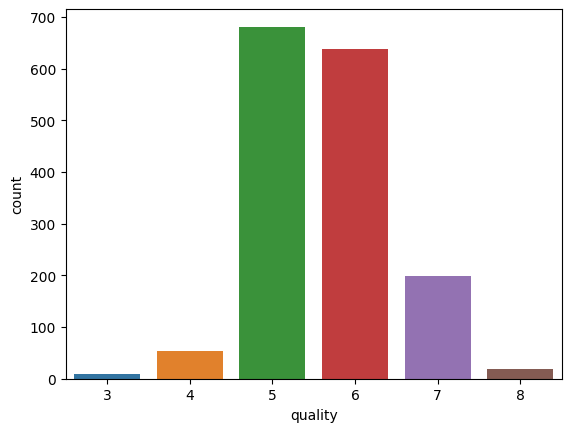

In [ ]:

sns.countplot(x='quality',data=wine)

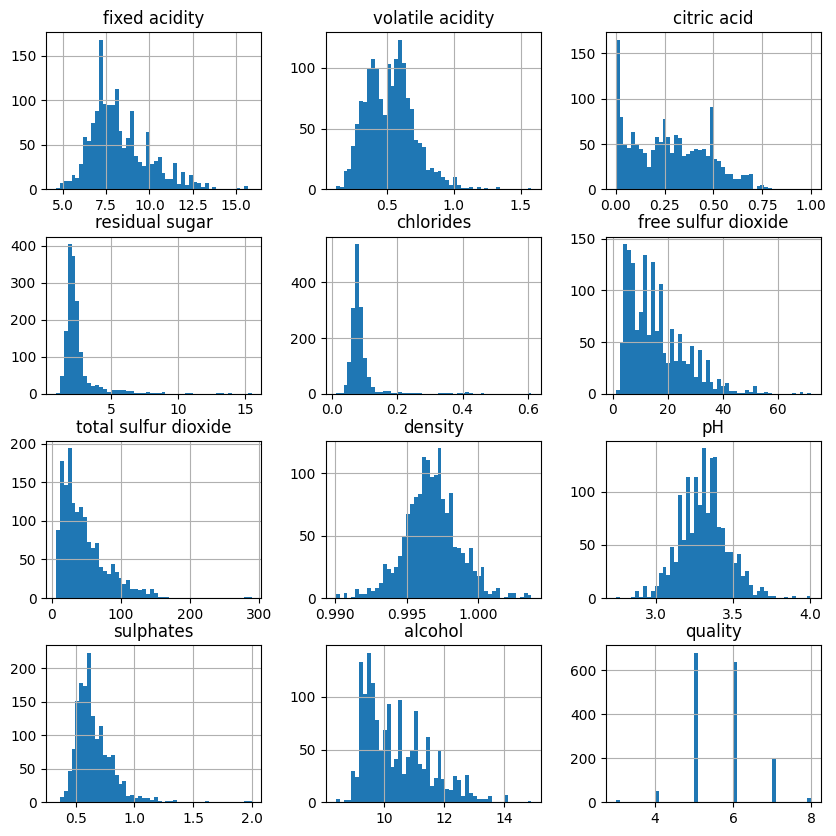

In [ ]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
wine.corr()
# Correlation analysis can reveal meaningful relationships between different metrics or groups of metrics.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

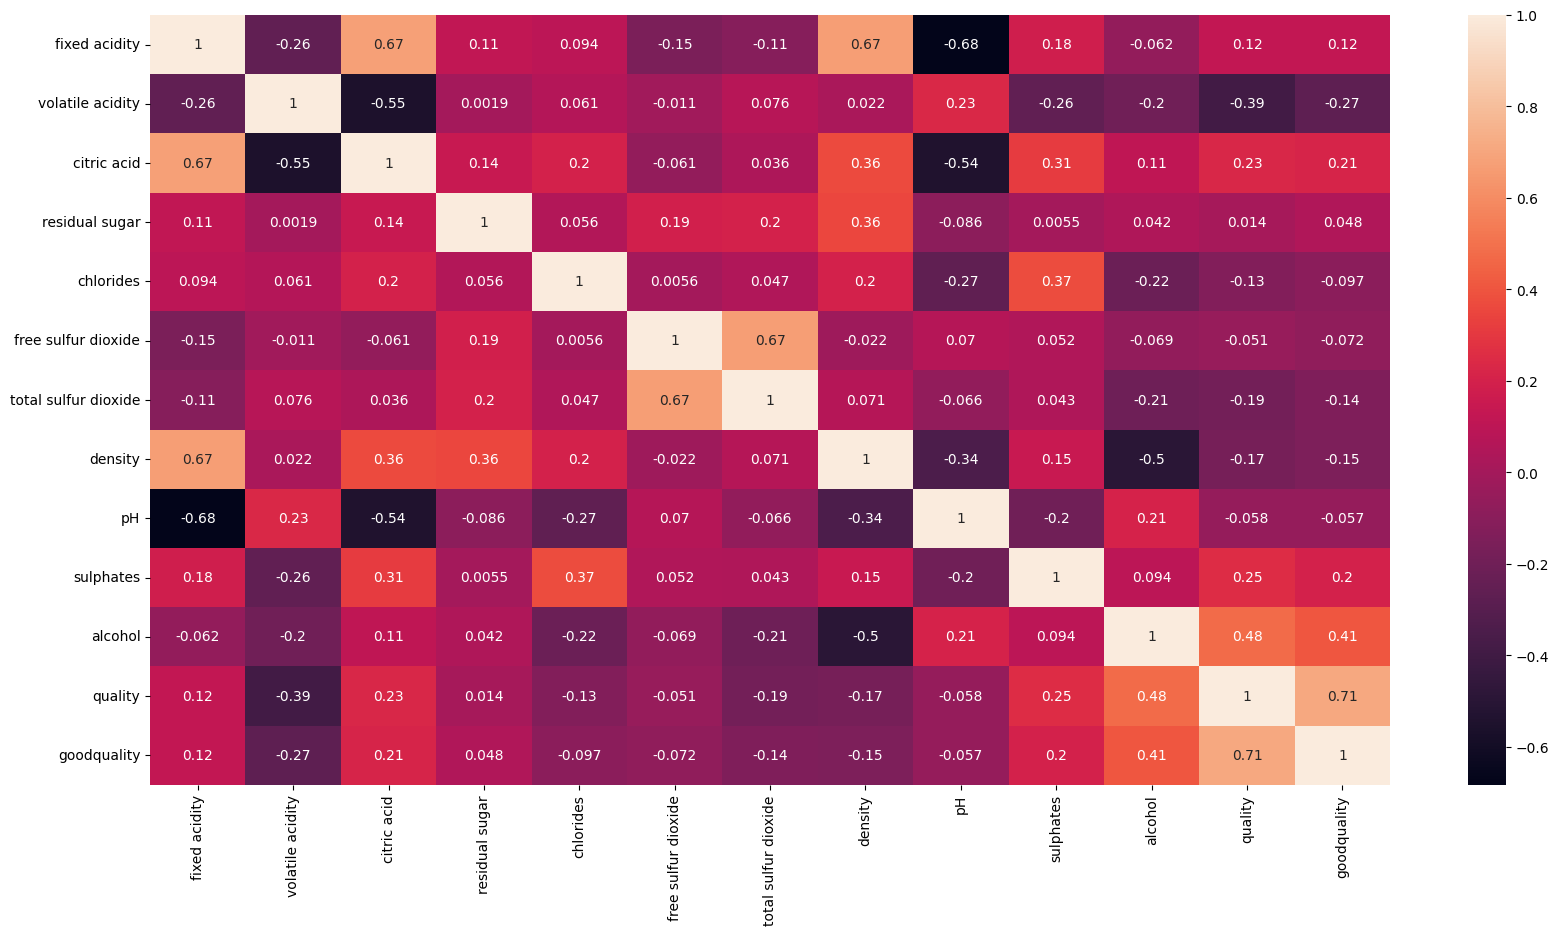

In [ ]:
corr = wine.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
y= wine['goodquality']

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='goodquality', ylabel='count'>

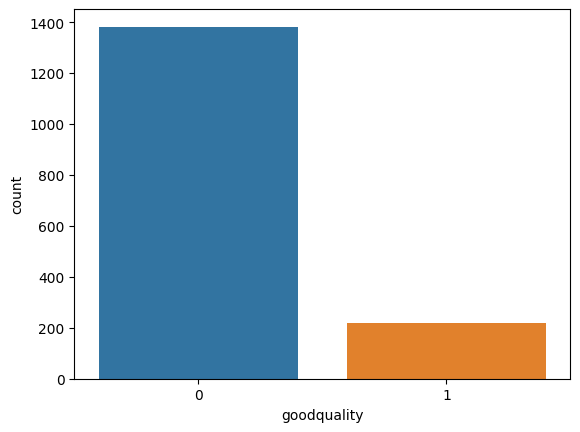

In [ ]:
sns.countplot(x='goodquality',data=wine)

In [ ]:
y = wine['goodquality']

In [ ]:
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


scaling=making it easier to build accurate and effective machine learning models

In [ ]:

scaler= MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])


train_test_split: allows you to simulate how your model would perform with new data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8583333333333333


In [ ]:
from sklearn.svm import SVC
sv= SVC()
sv.fit(X_train,y_train)
pred_y = sv.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y))

Accuracy Score: 0.8875


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,y_train)
y_pred =  dt .predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.86875


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8291666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.89375


In [ ]:
from sklearn.metrics import classification_report
models=[knn,sv,dt,nb,rf]
for model in models:
  print("****************",model,"'******************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

**************** KNeighborsClassifier(n_neighbors=3) '******************
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       417
           1       0.45      0.40      0.42        63

    accuracy                           0.86       480
   macro avg       0.68      0.66      0.67       480
weighted avg       0.85      0.86      0.85       480

**************** SVC() '******************
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       417
           1       0.70      0.25      0.37        63

    accuracy                           0.89       480
   macro avg       0.80      0.62      0.66       480
weighted avg       0.87      0.89      0.86       480

**************** DecisionTreeClassifier(criterion='entropy', random_state=7) '******************
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       417
           1       0.50 

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.872,0.868,0.864,0.833,0.893]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.893,Random Forest
0.872,KNN
0.868,SVC
0.864,Decision Tree
0.833,GaussianNB


<!-- oversampling -->

overSAMLPING

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)



In [ ]:
y_os.value_counts()

0    1382
1    1382
Name: goodquality, dtype: int64

In [ ]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_os,y_os,test_size=0.3,random_state=7)

In [ ]:
scaler= MinMaxScaler()
X_os=scaler.fit_transform(X_os)
X_os

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.05174588, 0.36685411, 0.02259424, ..., 0.64789313, 0.35004879,
        0.69665274],
       [0.37029101, 0.07606665, 0.35262846, ..., 0.56609661, 0.32114625,
        0.35463669],
       [0.2998069 , 0.23554185, 0.35756359, ..., 0.39216886, 0.23002723,
        0.70956647]])

In [ ]:
knn_os = KNeighborsClassifier(n_neighbors=3)
sv_os= SVC()
dt_os= DecisionTreeClassifier(criterion='entropy',random_state=7)
nb_os = GaussianNB()
rf_os= RandomForestClassifier(random_state=1)

In [ ]:
models=[knn,sv,dt,nb,rf]
for model in models:
  print("****************",model,"'******************")
  model.fit(X_os_train,y_os_train)
  y_os_pred=model.predict(X_os_test)
  print(classification_report(y_os_test,y_os_pred))

**************** KNeighborsClassifier(n_neighbors=3) '******************
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       411
           1       0.87      1.00      0.93       419

    accuracy                           0.92       830
   macro avg       0.93      0.92      0.92       830
weighted avg       0.93      0.92      0.92       830

**************** SVC() '******************
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       411
           1       0.83      0.89      0.86       419

    accuracy                           0.85       830
   macro avg       0.85      0.85      0.85       830
weighted avg       0.85      0.85      0.85       830

**************** DecisionTreeClassifier(criterion='entropy', random_state=7) '******************
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       411
           1       0.90 

In [ ]:
results_os = pd.DataFrame({
    'Model': ['KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.92,0.85 ,0.91, 0.79, 0.94]})

result_os_df = results_os.sort_values(by='Score', ascending=False)
result_os_df = result_os_df.set_index('Score')
result_os_df

,Model
Score,
0.94,Random Forest
0.92,KNN
0.91,Decision Tree
0.85,SVC
0.79,GaussianNB


**undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=undersampler.fit_resample(X,y)

In [ ]:
y_us.value_counts()

0    217
1    217
Name: goodquality, dtype: int64

In [ ]:
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
scaler= MinMaxScaler()
X_us=scaler.fit_transform(X_us)
X_us

array([[0.40186916, 0.16438356, 0.44736842, ..., 0.35555556, 0.17610063,
        0.33962264],
       [0.44859813, 0.20547945, 0.60526316, ..., 0.43333333, 0.22012579,
        0.67924528],
       [0.18691589, 0.19863014, 0.43421053, ..., 0.58888889, 0.22641509,
        0.45283019],
       ...,
       [0.23364486, 0.16438356, 0.39473684, ..., 0.4       , 0.19496855,
        0.50943396],
       [0.19626168, 0.30136986, 0.22368421, ..., 0.62222222, 0.18238994,
        0.3490566 ],
       [0.1682243 , 0.1369863 , 0.57894737, ..., 0.45555556, 0.25786164,
        0.54716981]])

In [ ]:
knn_us = KNeighborsClassifier(n_neighbors=3)
sv_us= SVC()
dt_us= DecisionTreeClassifier(criterion='entropy',random_state=7)
nb_us = GaussianNB()
rf_us= RandomForestClassifier(random_state=1)

In [ ]:
models=[knn,sv,dt,nb,rf]
for model in models:
  print("****************",model,"'******************")
  model.fit(X_us_train,y_us_train)
  y_us_pred=model.predict(X_us_test)
  print(classification_report(y_us_test,y_us_pred))

**************** KNeighborsClassifier(n_neighbors=3) '******************
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        63
           1       0.88      0.74      0.80        68

    accuracy                           0.81       131
   macro avg       0.82      0.81      0.81       131
weighted avg       0.82      0.81      0.81       131

**************** SVC() '******************
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        63
           1       0.92      0.81      0.86        68

    accuracy                           0.86       131
   macro avg       0.87      0.86      0.86       131
weighted avg       0.87      0.86      0.86       131

**************** DecisionTreeClassifier(criterion='entropy', random_state=7) '******************
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        63
           1       0.78 

In [ ]:
results_us = pd.DataFrame({
    'Model': ['KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [  0.81, 0.86 ,0.76,0.82,0.90]})

result_us_df = results_us.sort_values(by='Score', ascending=False)
result_us_df = result_us_df.set_index('Score')
result_us_df

,Model
Score,
0.90,Random Forest
0.86,SVC
0.82,GaussianNB
0.81,KNN
0.76,Decision Tree


In [ ]:
input_data=(7.1,0.71,0.0,1.9,0.08,14.0,35.0,0.9972,3.47,0.55,9.4)
# changing input data as numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
pred=rf.predict(input_data_reshape)
print(pred)
if pred==1:
  print("good quality")
else:
  print("bad quality")

[1]
good quality


<!-- saving the trained model -->

In [ ]:
# import pickle

file is writing in binary form

In [ ]:
# filename= 'trained_model.sav'
# pickle.dump(rf_os,open(filename,'wb'))

loading the saved model

In [ ]:
# loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [ ]:
# input_data=(6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
# # changing input data as numpy array
# input_data_as_numpy_array=np.asarray(input_data)
# # reshape the array as we are predicting for one instance
# input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
# pred=rf.predict(input_data_reshape)
# print(pred)
# if pred==1:
#   print("good quality")
# else:
#   print("bad quality")